In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('preprocessed_student_dataset.csv')

In [3]:
df

,Age,Gender,Study_Hours_per_Week,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,-1.582639,0.0,1.605127,0.650559,1,1.708927,-0.067365,-0.616001,1,2,-0.657989,0.511151,2
1,1.594887,0.0,0.220714,1.628328,0,-0.267263,-1.710558,-1.226232,1,1,1.447930,0.511151,3
2,-1.004907,0.0,1.528215,0.161674,0,-1.016852,-1.540573,0.265444,1,0,-0.214638,0.010366,3
3,-0.138309,0.0,-1.086788,-1.630902,1,-0.812418,-0.010703,-1.022822,1,0,1.004579,1.512721,1
4,-1.293773,0.0,-0.240757,1.465366,1,-1.084996,-0.407336,1.214692,1,1,1.226255,0.511151,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-1.004907,1.0,0.220714,-0.653133,1,-0.880563,-0.690645,0.062033,1,1,0.228714,-0.490419,2
9996,-0.138309,0.0,-0.856052,-0.327210,1,-1.425719,0.782562,0.740068,1,1,-0.990503,-0.991204,1
9997,0.728289,1.0,-0.317669,-1.142018,1,-1.425719,-1.710558,-0.344787,0,1,0.561228,0.511151,3
9998,-1.582639,1.0,1.066744,-0.490172,1,-0.607985,-1.427249,1.011282,1,0,-0.990503,0.511151,3


In [5]:
# Separate features and target
X = df.drop("Final_Grade", axis=1)
y = df["Final_Grade"]


In [6]:
# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
#Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
# Get feature importances
feature_importances = rf.feature_importances_


In [9]:
#  Create a DataFrame to display features and their importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

In [10]:
#Sort the importance values in descending order
importance_df.sort_values(by='Importance', ascending=False, inplace=True)


                                    Feature  Importance
6                            Exam_Score (%)    0.848311
5            Assignment_Completion_Rate (%)    0.021956
2                      Study_Hours_per_Week    0.021800
7                       Attendance_Rate (%)    0.021204
10  Time_Spent_on_Social_Media (hours/week)    0.020550
3                  Online_Courses_Completed    0.018256
0                                       Age    0.015510
11                    Sleep_Hours_per_Night    0.012658
9                Self_Reported_Stress_Level    0.006210
1                                    Gender    0.005377
4              Participation_in_Discussions    0.004238
8                   Use_of_Educational_Tech    0.003929


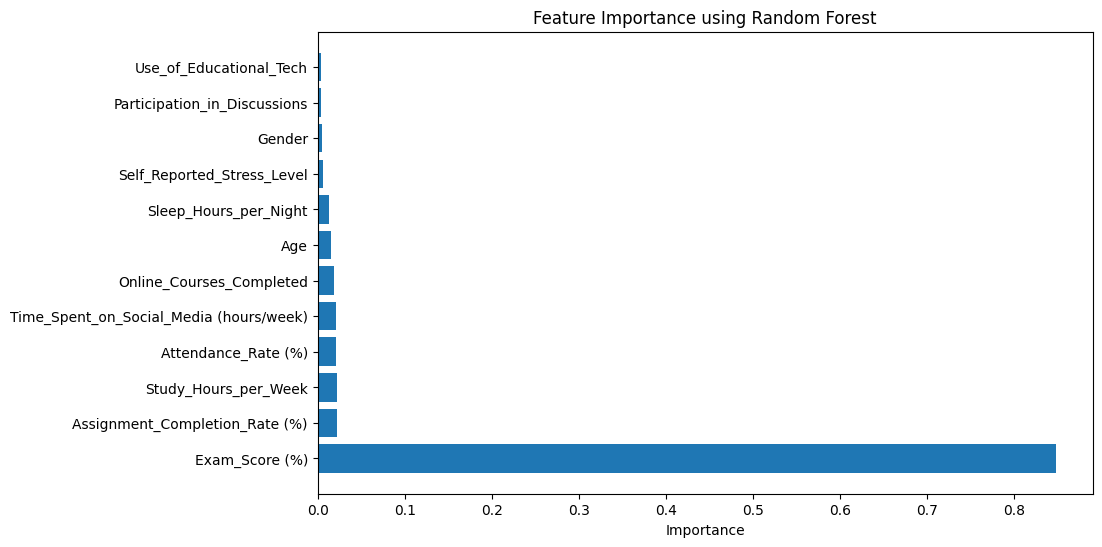

In [11]:
# Display the importance of features
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance using Random Forest')
plt.show()
